In [1]:
import numpy as np
import random
import collections 
import matplotlib.pyplot as plt

In [2]:
def check_win(configuration):
    wins = [[0,1,2,3],[4,5,6,7],[8,9,10,11],
            [12,13,14,15],[0,4,8,12],[1,5,9,13],
            [2,6,10,14],[3,7,11,15],[0,5,10,15],[3,6,9,12]]
    
    for i in range(10):
        if (configuration[wins[i][0]] == 1 and
            configuration[wins[i][1]] == 1 and
            configuration[wins[i][2]] == 1 and 
            configuration[wins[i][3]] == 1):
            return 1
    
    for i in range(10):
        if (configuration[wins[i][0]] == 2 and
            configuration[wins[i][1]] == 2 and
            configuration[wins[i][2]] == 2 and 
            configuration[wins[i][3]] == 2):
            return -1
    return 0

In [3]:
#converts the board into an integer to store the values
def state_to_key(state):
    key = 0
    for i, elem in enumerate(state):
        key += int(elem * 3**(i))
    return key

In [4]:
#returns the next and reward given a state and action
def make_move(state,action,player):
    state[action]=player
    reward=check_win(state)
    return state,reward

In [5]:
# for the mc agent to selects action based on the Q value
def mc_select_action(state,act_choices,q):
    act_chosen=-1
    q_val=-1000.0
    for act in act_choices:
        if (q[state][act]!=0 and q[state][act]>pi_val):
            q_val=q[state][act]
            act_chosen=act
    if (act_chosen<0):
        act_chosen = random.choice(act_choices)
        
    return act_chosen

In [6]:
#agent is playing based on the trained q values
def play_using_q(q):
    global win_list, loss_list, tie_list
    wins = 0 
    loss = 0 
    tie = 0 
    
    for i in range(1000):
        state = np.zeros(16)
        action_choices = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
        player=random.choice([0,1])
        reward=0
        while(len(action_choices)>0 and reward==0):
            player=player%2+1
            if (player==1):
                action = mc_select_action(state_to_key(state),action_choices,q) 
            else:
                action = random.choice(action_choices) 
            action_choices.remove(action)   
            new_state,reward=make_move(state,action,player)  
            
        if (reward==1):
            wins+=1
        elif (reward==-1):
            loss+=1
        else:
            tie+=1
            
    win_list.append(wins)
    loss_list.append(loss)
    tie_list.append(tie)
    print("    Win : ", wins, "Loss : ", loss, "Ties : ", tie)

In [9]:
#training function under 6 million episodes
def monte_carlo_control(pi,Q,Counts):
    global x_axis
    episode=[]
    for i in range(6000001):
        state = np.zeros(16)
        action_choices = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
        player=random.choice([0,1])
        reward=0
        episode=[]
        rewards=[]
        while(len(action_choices)>0 and reward==0):
            player=player%2+1
            state_key=state_to_key(state)
            action =  random.choice(action_choices)
            action_choices.remove(action)   
            new_state,reward=make_move(state,action,player) 
            episode.append((state_key,action))
            rewards.append(reward)
            state=new_state
            
        G=0
        for j,(s,a) in enumerate(reversed(episode)):
            ind_frw=len(rewards)-j-1
            reward=rewards[ind_frw]
            G+=reward
            if (s,a) not in episode[:ind_frw]:
                Counts[s][a] += 1
                Q[s][a] += (G-Q[s][a])/Counts[s][a]

        if (i>0 and (i%100000==0 or i==5 or i==10000 or i==50000)):
            print("After ",i," episodes: ")
            x_axis.append(i)
            play_using_q(Q)

In [10]:
win_list=[]
loss_list=[]
tie_list=[]
x_axis=[]
pi = np.zeros([3**16,16])
Counts = np.zeros([3**16,16])
Q = np.zeros([3**16,16])
myQ=monte_carlo_control(pi,Q,Counts)

After  5  episodes: 
    Win :  308 Loss :  303 Ties :  389
After  10000  episodes: 
    Win :  259 Loss :  297 Ties :  444
After  50000  episodes: 
    Win :  320 Loss :  262 Ties :  418
After  100000  episodes: 
    Win :  296 Loss :  287 Ties :  417
After  200000  episodes: 
    Win :  343 Loss :  277 Ties :  380
After  300000  episodes: 
    Win :  378 Loss :  265 Ties :  357
After  400000  episodes: 
    Win :  345 Loss :  262 Ties :  393
After  500000  episodes: 
    Win :  316 Loss :  294 Ties :  390
After  600000  episodes: 
    Win :  321 Loss :  276 Ties :  403
After  700000  episodes: 
    Win :  390 Loss :  243 Ties :  367
After  800000  episodes: 
    Win :  388 Loss :  228 Ties :  384
After  900000  episodes: 
    Win :  343 Loss :  270 Ties :  387
After  1000000  episodes: 
    Win :  377 Loss :  253 Ties :  370
After  1100000  episodes: 
    Win :  354 Loss :  286 Ties :  360
After  1200000  episodes: 
    Win :  375 Loss :  242 Ties :  383
After  1300000  episodes: 
  

[308, 259, 320, 296, 343, 378, 345, 316, 321, 390, 388, 343, 377, 354, 375, 373, 398, 395, 347, 407, 401, 397, 417, 442, 389, 398, 398, 408, 421, 412, 439, 406, 388, 429, 412, 398, 404, 429, 435, 424, 385, 451, 413, 450, 431, 451, 438, 431, 477, 440, 437, 483, 451, 457, 456, 454, 429, 462, 451, 475, 441, 496, 490]
[303, 297, 262, 287, 277, 265, 262, 294, 276, 243, 228, 270, 253, 286, 242, 277, 231, 248, 284, 253, 256, 264, 247, 260, 269, 241, 269, 259, 247, 259, 239, 266, 268, 249, 229, 261, 277, 240, 226, 234, 274, 233, 259, 229, 233, 241, 226, 241, 231, 232, 248, 239, 221, 215, 230, 229, 221, 218, 227, 225, 220, 210, 212]
[389, 444, 418, 417, 380, 357, 393, 390, 403, 367, 384, 387, 370, 360, 383, 350, 371, 357, 369, 340, 343, 339, 336, 298, 342, 361, 333, 333, 332, 329, 322, 328, 344, 322, 359, 341, 319, 331, 339, 342, 341, 316, 328, 321, 336, 308, 336, 328, 292, 328, 315, 278, 328, 328, 314, 317, 350, 320, 322, 300, 339, 294, 298]
[5, 10000, 50000, 100000, 200000, 300000, 400000, 50

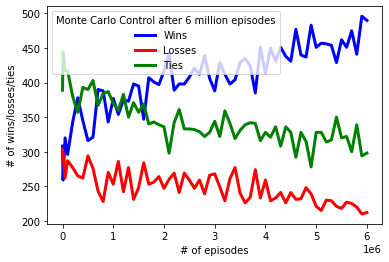

In [11]:
print(win_list)
print(loss_list)
print(tie_list)
print(x_axis)
plt.plot(x_axis,win_list,color='blue',linewidth=3,label='Wins')
plt.plot(x_axis,loss_list,color='red',linewidth=3,label='Losses')
plt.plot(x_axis,tie_list,color='green',linewidth=3,label='Ties')
plt.legend(title='Monte Carlo Control after 6 million episodes')
plt.xlabel("# of episodes")
plt.ylabel("# of wins/losses/ties")
plt.show()